# Summary

Our research question is "How have gun ownership practices and social attitudes towards gun control changed over the past 50 years?"

# Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('selected_gss_data.csv', low_memory=False)
print(df.shape, '\n')
print(df.dtypes, '\n')
df.head()

(72390, 5) 

year       int64
id         int64
gunlaw    object
owngun    object
hunt      object
dtype: object 



,year,id,gunlaw,owngun,hunt
0,1972,1,favor,NaN,NaN
1,1972,2,favor,NaN,NaN
2,1972,3,favor,NaN,NaN
3,1972,4,favor,NaN,NaN
4,1972,5,favor,NaN,NaN


### Verify year/id is clean

In [3]:
year = df['year']
year.unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021,
       2022], dtype=int64)

In [4]:
year.value_counts()     # Represents how many respondents were in each year

year
2006    4510
2021    4032
2022    3544
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: count, dtype: int64

In [5]:
print('Total missing: ', sum(year.isnull()))

Total missing:  0


In [6]:
id = df['id']
id.unique()

array([   1,    2,    3, ..., 4508, 4509, 4510], dtype=int64)

In [7]:
id.value_counts()   # Represents how many years each respondant participated in

id
1       34
727     34
711     34
712     34
713     34
        ..
4278     1
3671     1
3669     1
3665     1
4510     1
Name: count, Length: 4510, dtype: int64

In [8]:
print('Total missing: ', sum(id.isnull()))

Total missing:  0


### Clean gunlaw

In [9]:
gunlaw = df['gunlaw']
gunlaw.value_counts()

gunlaw
favor     36367
oppose    11940
Name: count, dtype: int64

From the codebook, the missing values represent "Don't Know", "No Answer", "Not Applicable", or "Skipped on Web"

In [10]:
print('Total missing: ', sum(gunlaw.isnull()))

Total missing:  24083


Make a subset of the dataframe for observations with valid responses to the gunlaw question

In [11]:
del gunlaw
df_gunlaw = df.dropna(axis=0, subset=['gunlaw'])
print(sum(df_gunlaw['gunlaw'].isnull()))
df_gunlaw.head(10)

0


,year,id,gunlaw,owngun,hunt
0,1972,1,favor,NaN,NaN
1,1972,2,favor,NaN,NaN
2,1972,3,favor,NaN,NaN
3,1972,4,favor,NaN,NaN
4,1972,5,favor,NaN,NaN
5,1972,6,oppose,NaN,NaN
6,1972,7,favor,NaN,NaN
7,1972,8,favor,NaN,NaN
8,1972,9,favor,NaN,NaN
9,1972,10,favor,NaN,NaN


### Clean owngun

In [12]:
owngun = df['owngun']
owngun.value_counts()

owngun
no             27551
yes            17800
refused_(3)      512
Name: count, dtype: int64

In [13]:
print('Total missing: ', sum(owngun.isnull()))

Total missing:  26527


Replace refuesed with nan, they chose to not answer

In [14]:
owngun = owngun.replace(['refused_(3)'], np.nan)
owngun.value_counts()

owngun
no     27551
yes    17800
Name: count, dtype: int64

In [15]:
print('Total missing: ', sum(owngun.isnull()))

Total missing:  27039


In [16]:
df['owngun'] = owngun
del owngun
print('Total missing: ', sum(df['owngun'].isnull()))
df['owngun'].value_counts()

Total missing:  27039


owngun
no     27551
yes    17800
Name: count, dtype: int64

Make a subset of the dataframe for observations with valid responses to the owngun question

In [17]:
df_owngun = df.dropna(axis=0, subset=['owngun'])
print(sum(df_owngun['owngun'].isnull()))
df_owngun.head(10)

0


,year,id,gunlaw,owngun,hunt
1613,1973,1,oppose,yes,NaN
1614,1973,2,oppose,yes,NaN
1615,1973,3,oppose,yes,NaN
1616,1973,4,oppose,yes,NaN
1617,1973,5,favor,yes,NaN
1618,1973,6,favor,no,NaN
1619,1973,7,favor,no,NaN
1620,1973,8,favor,no,NaN
1621,1973,9,favor,no,NaN
1622,1973,10,favor,no,NaN


### Clean hunt

In [18]:
hunt = df['hunt']
hunt.value_counts()

hunt
no, neither r nor spouse hunts    33607
yes, respondent does               4975
yes, spouse does                   2072
yes, both do                        920
Name: count, dtype: int64

In [19]:
print('Total missing: ', sum(hunt.isnull()))

Total missing:  30816


Combine responses for hunt so the question simply represents either the respondent's family does hunt or not

In [20]:
hunt = hunt.replace(['yes, respondent does', 'yes, spouse does','yes, both do'], 'yes')
hunt = hunt.replace(['no, neither r nor spouse hunts'], 'no')
hunt.value_counts()

hunt
no     33607
yes     7967
Name: count, dtype: int64

In [21]:
df['hunt'] = hunt
del hunt
print('Total missing: ', sum(df['hunt'].isnull()))
df['hunt'].value_counts()

Total missing:  30816


hunt
no     33607
yes     7967
Name: count, dtype: int64

Make a subset of the dataframe for observations with valid responses to the hunt question

In [22]:
df_hunt = df.dropna(axis=0, subset=['hunt'])
print(sum(df_hunt['hunt'].isnull()))
df_hunt.head(10)

0


,year,id,gunlaw,owngun,hunt
7590,1977,1,favor,no,no
7591,1977,2,oppose,no,no
7592,1977,3,favor,no,no
7593,1977,4,favor,no,no
7594,1977,5,favor,no,no
7595,1977,6,favor,no,no
7596,1977,7,favor,no,no
7597,1977,8,favor,no,no
7598,1977,9,oppose,no,no
7599,1977,10,favor,no,no


### Final cleaning

Drop rows in overall df where all variables of interest (gunlaw, owngun, and hunt) are nan

In [23]:
print(df.shape)
df = df.dropna(axis=0, subset=['gunlaw', 'owngun', 'hunt'], how='all')
print(df.shape)

(72390, 5)
(49129, 5)


Export to csv

In [24]:
df.to_csv('cleaned_gss.csv', header=['year', 'id', 'gunlaw', 'owngun', 'hunt'], index=False)

# Results

In [25]:
pd.crosstab(df['gunlaw'],df['owngun'],normalize='index')  # this is across all time, try grouping by 10 year ranges to see a trend

owngun,no,yes
gunlaw,,
favor,0.668511,0.331489
oppose,0.411541,0.588459


In [26]:
pd.crosstab(df['gunlaw'],df['hunt'],normalize='index')

hunt,no,yes
gunlaw,,
favor,0.858510,0.141490
oppose,0.650559,0.349441


In [27]:
# Import dependencies to create visulizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [28]:
# Define outliers method
def outliers(data, column_name):
    # Calculate Q1 and Q3 of the column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Determine the outlier cutoffs
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

    print(outliers.sum())


In [29]:
# Define a method to find R-squared value
def correlation(data, x, y):
    # Pass in X and y for regression. Use np.newaxis because X needs to be an array
    X = data[x].values[:, np.newaxis]
    y = data[y].values

    # Create a LinearRegression object
    reg = LinearRegression()

    # Fit the regression model
    reg.fit(X, y)

    # Get the R-squared value
    r_squared = reg.score(X, y)

    print('R-squared:', r_squared)

## Analysis of Gun Practice Over Time

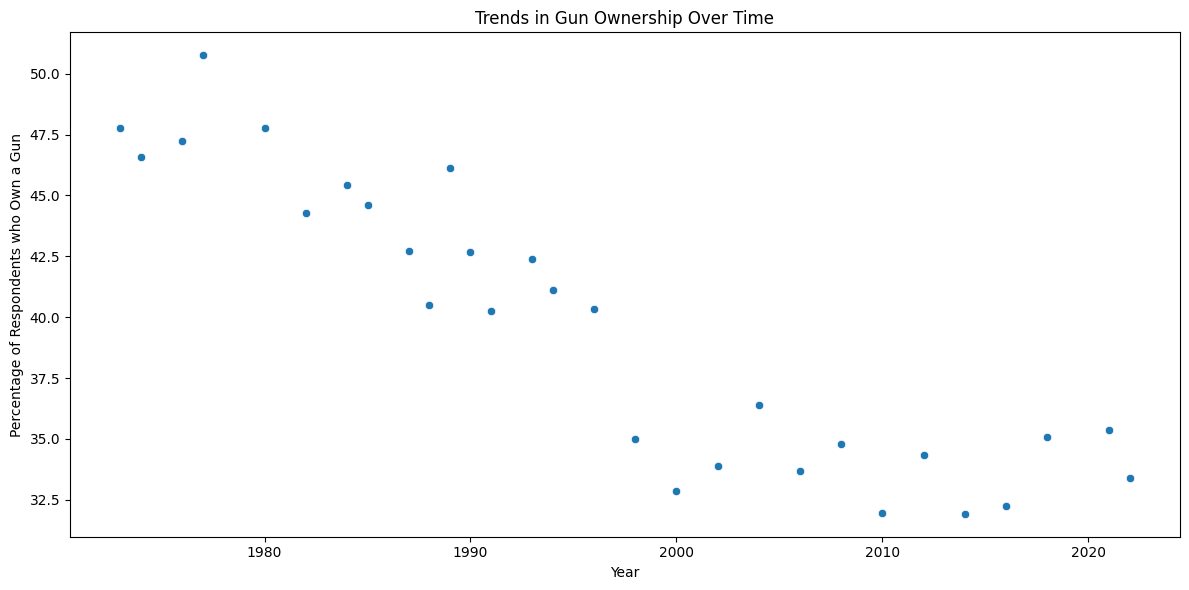

In [30]:
# Takes the owngun dataframe and creates a new dataframe with the counts for yes and no for each year
owngun_vote_count = df_owngun.groupby(['year', 'owngun']).size().unstack()

# Convert counts to percentages for each year
owngun_trends_percentage = owngun_vote_count.div(owngun_vote_count.sum(axis=1), axis=0) * 100  

# Drop the no column as graphing this would be redudant
owngun_percentage = owngun_trends_percentage.drop(columns = 'no')

# Get year to be a column again
owngun_percentage.reset_index(inplace=True)

plt.figure(figsize=(12, 6))

# Create the line plot for gun ownership trends
sns.scatterplot(data=owngun_percentage, x='year', y='yes')

# Add title and labels
plt.title('Trends in Gun Ownership Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents who Own a Gun')


# Ensure everything fits nicely in the plot area
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Number of outliers
outliers(data=owngun_percentage, column_name='yes')

0


In [32]:
# Getting numerical summary
owngun_summary = owngun_percentage['yes'].describe()
print(owngun_summary)

count    29.000000
mean     39.706471
std       5.862312
min      31.925166
25%      34.348165
50%      40.334378
75%      44.605263
max      50.757077
Name: yes, dtype: float64


In [33]:
# Getting R-squared value
correlation(owngun_percentage, 'year', 'yes')

R-squared: 0.8250481788035885


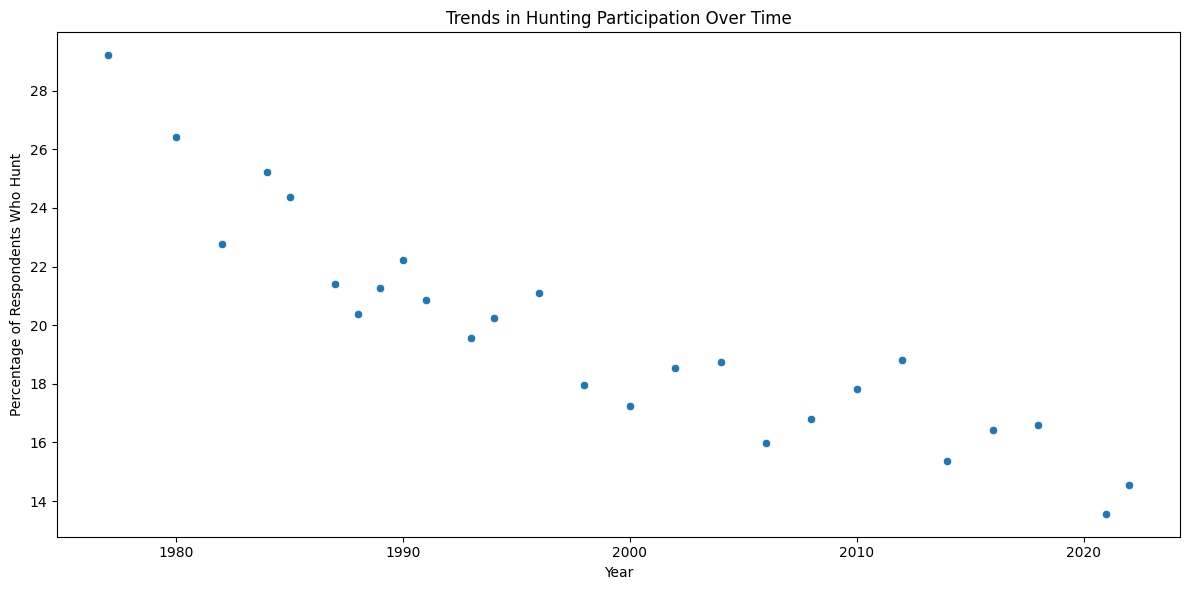

In [34]:
# Takes the hunt dataframe and creates a new dataframe with the counts for yes and no for each year
hunt_vote_count = df_hunt.groupby(['year', 'hunt']).size().unstack()

# Convert counts to percentages for each year
hunt_trends_percentage = hunt_vote_count.div(hunt_vote_count.sum(axis=1), axis=0) * 100  

# Drop the no column as graphing this would be redundant
hunting_percentage = hunt_trends_percentage.drop(columns = 'no')

# Get year to be a column again
hunting_percentage.reset_index(inplace=True)

#Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hunting_percentage, x='year', y='yes')
plt.title('Trends in Hunting Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents Who Hunt')
plt.tight_layout()
plt.show()

In [35]:
# Number of outliers
outliers(data=hunting_percentage, column_name='yes')

1


In [36]:
# Getting numerical summary
hunting_summary = hunting_percentage['yes'].describe()
print(hunting_summary)

count    26.000000
mean     19.743793
std       3.763480
min      13.565217
25%      16.912121
50%      19.180206
75%      21.357430
max      29.207597
Name: yes, dtype: float64


In [37]:
# Getting R-squared value
correlation(hunting_percentage, 'year', 'yes')

R-squared: 0.8265259412097069


#### It seems as though both hunting practices and gun ownership has significantly decreased over the years. Both calculated R-squared values (0.8250481788035885 and 0.8265259412097069) support this, as the values indicate that there is a strong relationship between time and gun ownership/hunting. Hunting practices decreasing could be due to a handful of reasons, such as a shift in recreational habits, potentially driven by changing cultural values, increased urbanization, or greater environmental consciousness. The decreasing trend in gun ownership by individuals/households could possibly be due to increasing gun control, economic factors, and simply lack of interest (maybe due to decrease of hunting popularity?).

## Analysis of Social Attitudes Changes

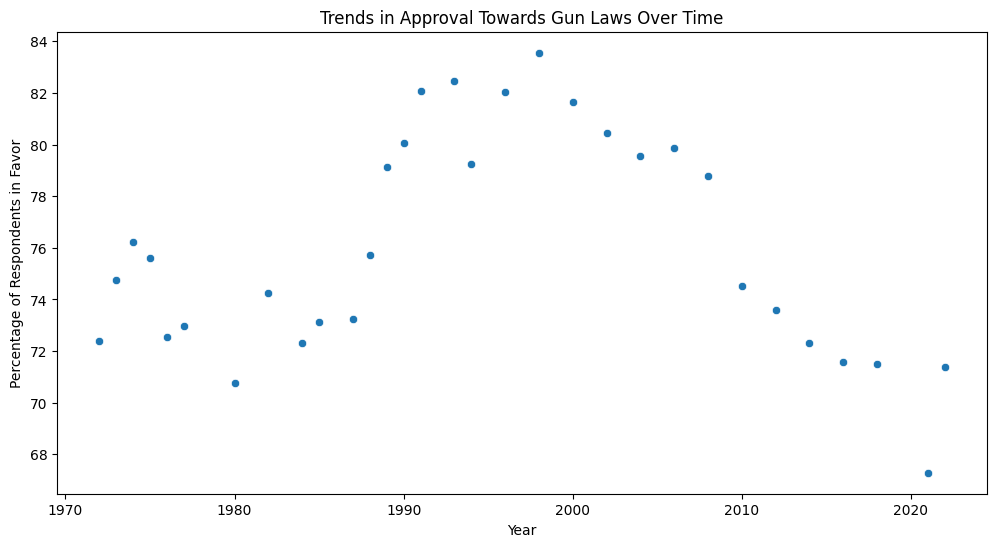

In [38]:
# Takes the gunlaw dataframe and creates a new dataframe with the counts of votes in favor and oppose for each year
gunlaw_vote_count = df_gunlaw.groupby(['year', 'gunlaw']).size().unstack()

# Convert counts to percentages for each year
gunlaw_trends_percentage = gunlaw_vote_count.div(gunlaw_vote_count.sum(axis=1), axis=0) * 100  

# Drop the oppose column as graphing this would be redudant
gunlaw_approve_percentage = gunlaw_trends_percentage.drop(columns = 'oppose')

# Make year its own col again 
gunlaw_approve_percentage.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data = gunlaw_approve_percentage, x='year', y='favor')
plt.title('Trends in Approval Towards Gun Laws Over Time')
plt.ylabel('Percentage of Respondents in Favor') 
plt.xlabel('Year')
plt.show()

#### As seen from this graph, it seems as though there is no certain trend over the years for favoring/not favoring gun laws over the years as there was a increase between 1970-1990s and a decrease between 2000-2020. This increase-to-decrease could be due to multiple reasonings and it's hard to say what could have caused this. There could also be bias to those who own guns vs. don't own guns, let's explore this possibilty further.

In [39]:
# Number of outliers
outliers(data=gunlaw_approve_percentage, column_name='favor')

0


In [40]:
# Spliting the graph and analyzing in halves
midpoint = len(gunlaw_approve_percentage) // 2
first_half = gunlaw_approve_percentage.iloc[:midpoint]
second_half = gunlaw_approve_percentage.iloc[midpoint:]

In [41]:
# Getting numerical summary
first_half_summary = first_half['favor'].describe()
second_half_summary = second_half['favor'].describe()
print(first_half_summary)
print(second_half_summary)

count    15.000000
mean     75.011108
std       3.209174
min      70.743572
25%      72.768168
50%      74.255788
75%      75.964682
max      82.069672
Name: favor, dtype: float64
count    16.000000
mean     76.862572
std       5.036016
min      67.284569
25%      72.118859
50%      79.011826
75%      80.760783
max      83.560152
Name: favor, dtype: float64


In [42]:
# Getting R-squared value
correlation(first_half, 'year', 'favor')
correlation(second_half, 'year', 'favor')

R-squared: 0.3031681496542652
R-squared: 0.85839357602077


#### These differing R-squared values between the first half and second half of the trends in approval towards gun laws over time are conflicting as this means there is not a distinguishable relationship of favoring gun laws over time.

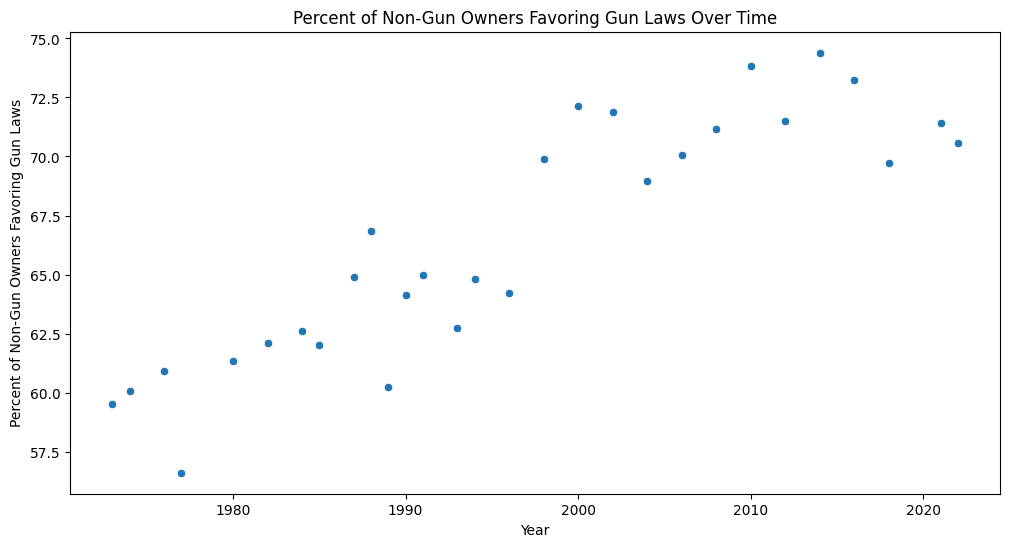

In [44]:
# Filter for respondents who favor gun laws
favor_gunlaw = df[df['gunlaw'] == 'favor']

# Group by year and owngun and calculate the size of each group
favor_gunlaw_count = favor_gunlaw.groupby(['year', 'owngun']).size().unstack()

# Calculate the precent of respondents who do not own a gun each year among those who favor gun laws
favor_gunlaw_count['no_percent'] = (favor_gunlaw_count['no'] / (favor_gunlaw_count['yes'] + favor_gunlaw_count['no'])) * 100

# Get year to be a col again
favor_gunlaw_count.reset_index(inplace=True)

# Rename
favor_gunlaw_count_no_gun = favor_gunlaw_count

# Plotting 
plt.figure(figsize=(12, 6))
sns.scatterplot(x=favor_gunlaw_count_no_gun['year'], y=favor_gunlaw_count_no_gun['no_percent'])
plt.title('Percent of Non-Gun Owners Favoring Gun Laws Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Non-Gun Owners Favoring Gun Laws')
plt.show()

In [45]:
# Number of outliers
outliers(data=favor_gunlaw_count_no_gun, column_name='no_percent')

0


In [46]:
# Getting numerical summary
favor_gunlaw_count_no_gun_summary = favor_gunlaw_count_no_gun['no_percent'].describe()
print(favor_gunlaw_count_no_gun_summary)

count    29.000000
mean     66.446015
std       5.080818
min      56.605505
25%      62.115529
50%      64.981037
75%      71.181556
max      74.395329
Name: no_percent, dtype: float64


In [47]:
# Getting R-squared value
correlation(favor_gunlaw_count_no_gun, 'year', 'no_percent')

R-squared: 0.7926777089197781


#### This high R-squared value indicates that there is a strong relationship between time and non-gun owners favoring gun laws.

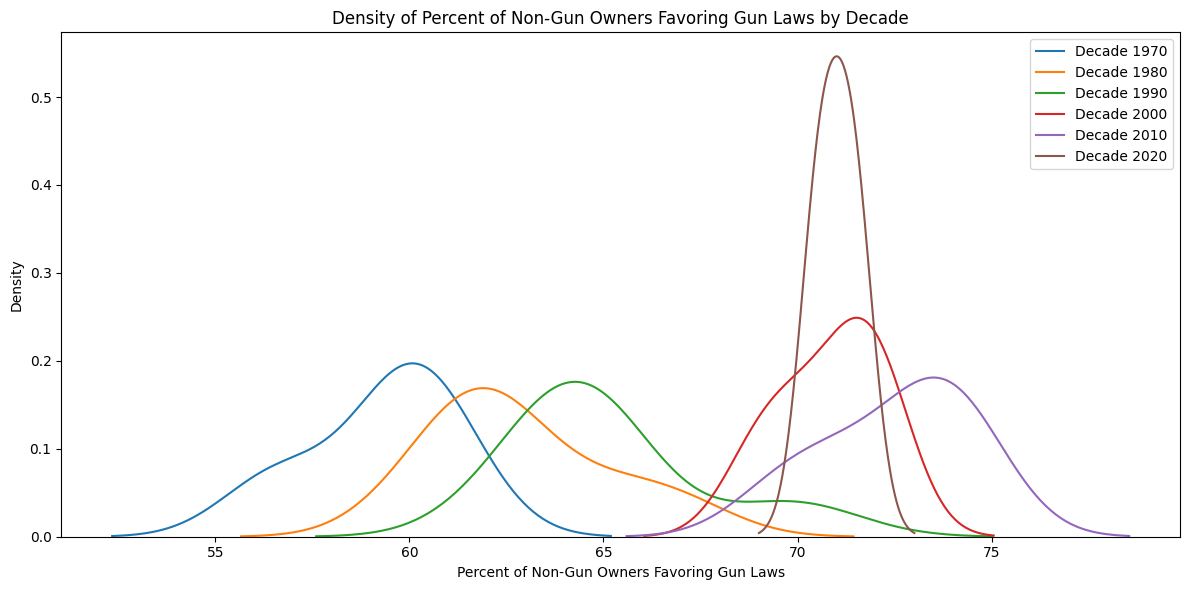

In [48]:
# Create decade col
favor_gunlaw_count_no_gun['decade'] = (favor_gunlaw_count_no_gun['year'] // 10) * 10

plt.figure(figsize=(12, 6))

# Loop through and plot each decade
decades = favor_gunlaw_count_no_gun['decade'].unique()
for decade in sorted(decades):
    subset = favor_gunlaw_count_no_gun[favor_gunlaw_count_no_gun['decade'] == decade]
    sns.kdeplot(subset['no_percent'], label=f'Decade {decade}')

#Plotting
plt.title('Density of Percent of Non-Gun Owners Favoring Gun Laws by Decade')
plt.xlabel('Percent of Non-Gun Owners Favoring Gun Laws')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### The graph provides the following insights:

- The distribution shapes are different for each decade, suggesting changes in the attitudes of non-gun owners towards gun laws over time.
- The peaks of the KDE lines indicate the most common percentage points of favorability towards gun laws among non-gun owners for each decade.
- The 2020s shows a sharp peak at a high percentage level, which implies a strong consensus or agreement among non-gun owners in favoring gun laws during this decade.
- Earlier decades show wider distributions, suggesting more variation in the attitudes of non-gun owners toward gun laws.

### Further Analysis

#### DO NOT KNOW IF WE SHOULD KEEP  ------ There is a clear distinction on favoring trends between those who own guns and do not. This makes the previous scatter on both groups' favorings clear on why it was indistinguishable on its trends. It was only during the 1990s where both parties significantly favored gun laws. ------ DO NOT KNOW IF WE SHOULD KEEP Let's futher explore gun ownership practices below and compare trends of social attitudes to them. We will use the trend of percent of non-gun owners favoring gun laws for further analysis (not for any particular reason).

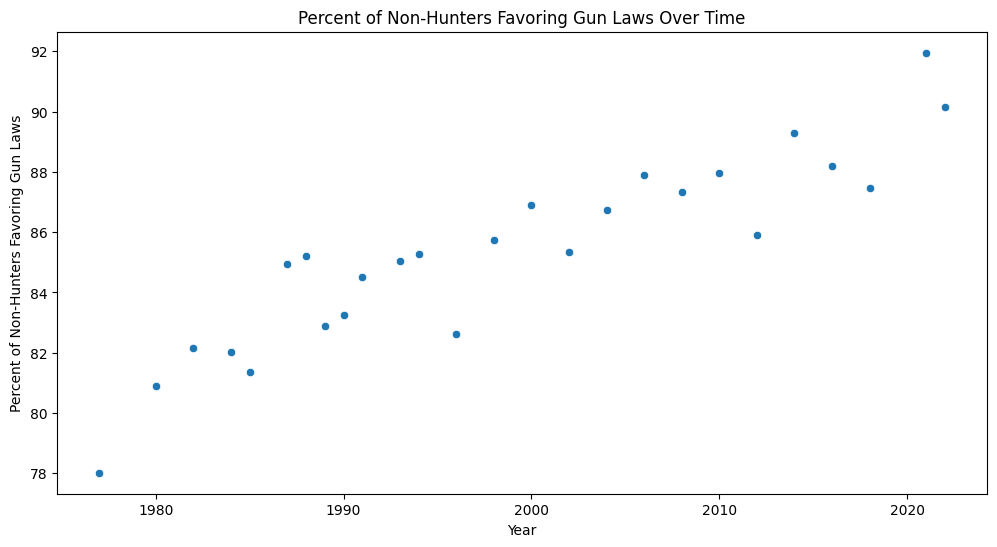

In [49]:
# Group by year and owngun and calculate the size of each group
favor_gunlaw_count = favor_gunlaw.groupby(['year', 'hunt']).size().unstack()

# Calculate the precent of respondents who do not own a gun each year among those who favor gun laws
favor_gunlaw_count['no_percent'] = (favor_gunlaw_count['no'] / (favor_gunlaw_count['yes'] + favor_gunlaw_count['no'])) * 100

# Get year to be a col again
favor_gunlaw_count.reset_index(inplace=True)

# Rename
favor_gunlaw_count_non_hunter = favor_gunlaw_count

# Plotting 
plt.figure(figsize=(12, 6))
sns.scatterplot(x=favor_gunlaw_count_non_hunter['year'], y=favor_gunlaw_count_non_hunter['no_percent'])
plt.title('Percent of Non-Hunters Favoring Gun Laws Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Non-Hunters Favoring Gun Laws')
plt.show()

In [50]:
# Number of outliers
outliers(data=favor_gunlaw_count_non_hunter, column_name='no_percent')

0


In [51]:
# Getting numerical summary
favor_gunlaw_count_non_hunter_summary = favor_gunlaw_count_non_hunter['no_percent'].describe()
print(favor_gunlaw_count_non_hunter_summary)

count    26.000000
mean     85.349689
std       3.136346
min      78.021978
25%      82.972150
50%      85.313412
75%      87.429770
max      91.949310
Name: no_percent, dtype: float64


In [52]:
# Getting R-squared value
correlation(favor_gunlaw_count_non_hunter, 'year', 'no_percent')

R-squared: 0.8279949110502505


This high R-squared value shows a strong relationship between time and non-hunters favoring gun laws.

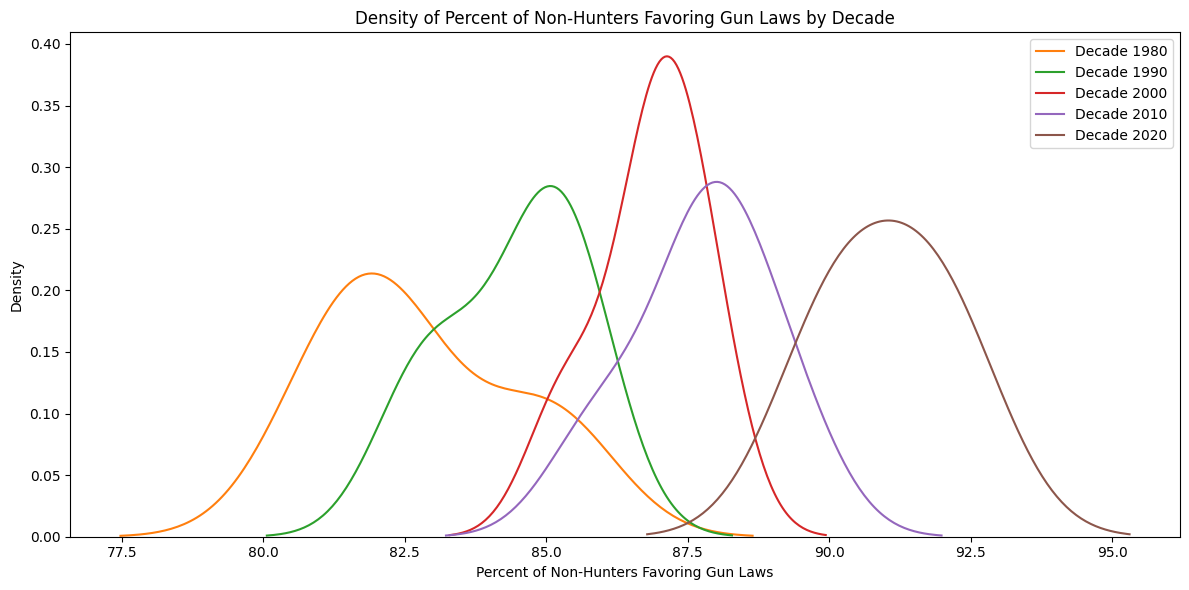

In [53]:
#Create decades col
favor_gunlaw_count_non_hunter['decade'] = (favor_gunlaw_count_non_hunter['year'] // 10) * 10

plt.figure(figsize=(12, 6))

# Loop through and plot each decade
decades = favor_gunlaw_count_non_hunter['decade'].unique()
for decade in sorted(decades):
    subset = favor_gunlaw_count_non_hunter[favor_gunlaw_count_non_hunter['decade'] == decade]
    sns.kdeplot(subset['no_percent'], label=f'Decade {decade}',warn_singular=False)

#Plotting

plt.title('Density of Percent of Non-Hunters Favoring Gun Laws by Decade')
plt.xlabel('Percent of Non-Hunters Favoring Gun Laws')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

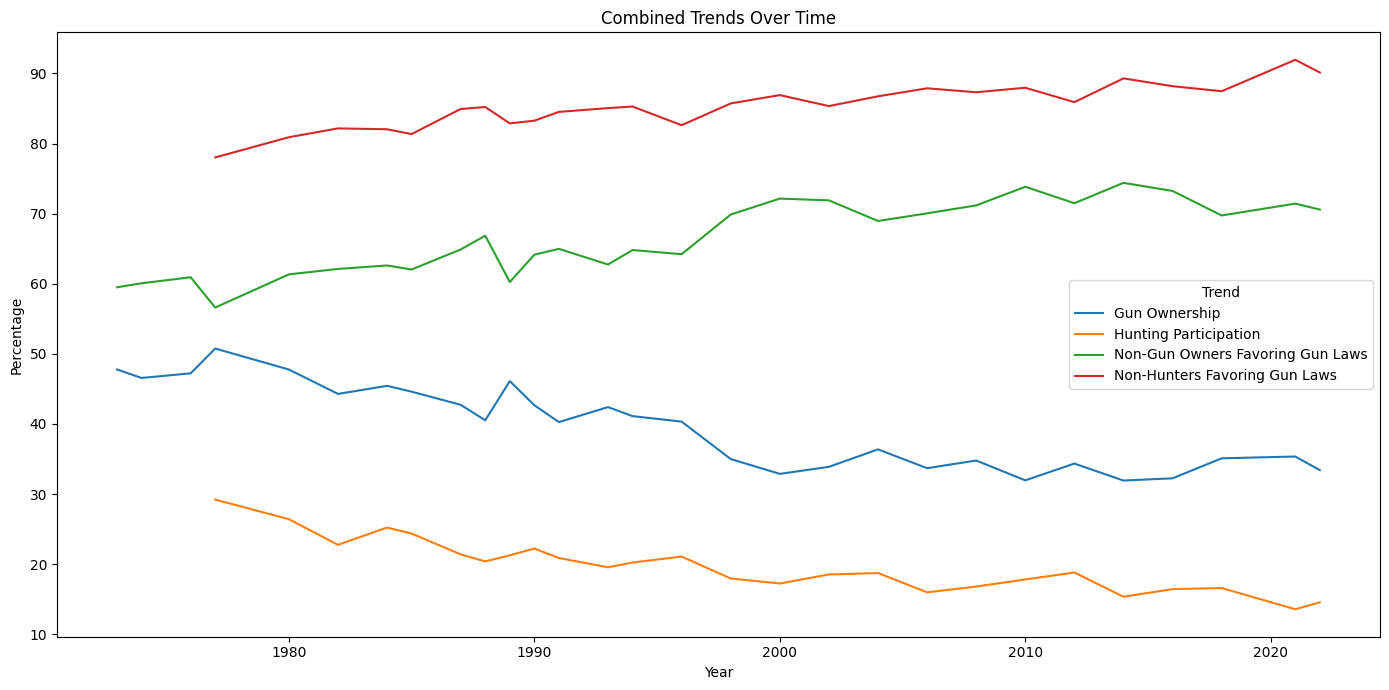

In [54]:
plt.figure(figsize=(14, 7))

# Line plot for gun ownership trends
sns.lineplot(data=owngun_percentage, x='year', y='yes', label='Gun Ownership')

# Line plot for hunting participation trends
sns.lineplot(data=hunting_percentage, x='year', y='yes', label='Hunting Participation')

# Line plot for the percent of non-gun owners favoring gun laws
sns.lineplot(data=favor_gunlaw_count_no_gun, x='year', y='no_percent', label='Non-Gun Owners Favoring Gun Laws')

# Line plot for the percent of non-hunters favoring gun laws
sns.lineplot(data=favor_gunlaw_count_non_hunter, x='year', y='no_percent', label='Non-Hunters Favoring Gun Laws')

#Plotting
plt.title('Combined Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Trend')
plt.tight_layout()
plt.show()

## Analysis of Gun Ownership Practices

#### Based on the graphs above, we see around a 10% overall increase in non-gun owners favoring a restrictive gun law, from around 60% to 70%. The overall decrease in gun ownership over time was similar at around a 14% decrease from about 48% to 34% of participants owning guns. 

#### It seems as though as hunting practices has significantly decreased over the years, this could be due to a handful of reasons, such as a shift in recreational habits, potentially driven by changing cultural values, increased urbanization, or greater environmental consciousness. The decreasing trend in gun ownership suggests a change in gun ownership practices, with possibly fewer households owning guns or individuals owning fewer guns.



### Conclusion
Our project explores the question: "How have gun ownership practices and social attitudes towards gun control changed over the past 50 years?". To fully examine this question, we analyzed the 'gunlaw', 'owngun', and 'hunt' variables across multiple years in the General Social Survey (GSS) dataset. Analyzing the 'owngun' and 'hunt' variables give us direct access to trends in gun ownership over time. Since the 'gunlaw' variable represents if participants in the GSS oppose or favor a law that requires a police permit to buy a gun, the variable reflects the current attitudes regarding the strictness of gun laws over time. Therefore, these three variables are appropriate in addressing our research question.

When cleaning the variables, we omitted null and invalid values, leaving us with "oppose" or "favor" values for the 'gunlaw' variable, and 'yes' and 'no' values for the 'owngun' and 'hunt' variables. Our data cleaning processes increased the uniformity and simplicity of our data, priming them for efficient analysis.

In our analysis, we found that there was evidence of a positive trend concerning non-gun owners favoring gun laws over time. By separating non-gun owners from gun owners in our analysis of social attitudes towards guns, we reduced possible biases that gun owners could exhibit in their attitude towards restrictive gun laws. We also found there was a negative trend regarding gun owners favoring gun laws over time. The percent of hunters and gun owners also followed a similar negative trend over the duration of the GSS survey. Based on the various trends of our analysis, we conclude that Americans have become decreasingly inclined to own and use guns. Additionally, non-gun owners have adopted more of an attitude that favors gun control and gun owners' attitudes became less in favor of gun control. 